In [3]:
# Project Dataset

import pandas as pd
df = pd.read_csv("loan-eligibility.csv")

In [33]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
# Columns with Missing Values

## ตรวจสอบร้อยละของ missing values
missing = df.isnull().sum()/len(df)
print(missing)

## แสดงรายชื่อตัวแปรที่มี missing values > 30%
variables = df.columns[:-1] #ทุกตัวแปร ยกเว้น target variable
variable = []
for i in range(0, len(df.columns[:-1])):
    if missing[i] > 0.03:
        variable.append(variables[i])
print(f'variable: ', variable)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64
variable:  ['Self_Employed', 'LoanAmount', 'Credit_History']


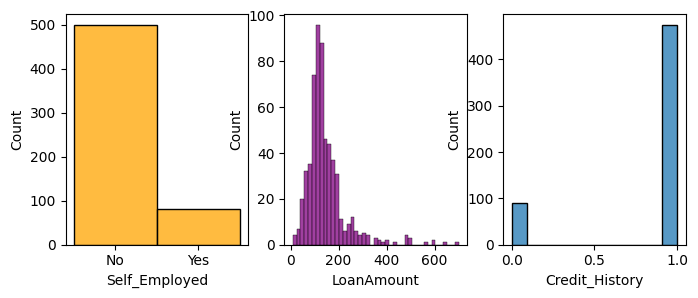

In [30]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(8,3))
sns.histplot(ax=axes[0], x=df['Self_Employed'], color='orange')
sns.histplot(ax=axes[1], x=df['LoanAmount'], color='purple')
sns.histplot(ax=axes[2], x=df['Credit_History']);

In [2]:
## แทนค่าสูญหาย
df['Self_Employed'].fillna(
    df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(
    df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(
    df['Credit_History'].mode()[0], inplace=True)

In [44]:
# Filtering Columns Based on Variance: เลือกฟีเจอร์ด้วยตัวเอง
## ลบคอลัมน์ 'Loan_ID','Loan_Status'
features = df[df.columns[1:-1]]

## convert categorical columns into numeric columns
import warnings
warnings.filterwarnings("ignore")

features['Gender'].replace(['Male','Female'],[0,1],inplace=True)
features['Married'].replace(['No','Yes'],[0,1],inplace=True)
features['Dependents'].replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
features['Education'].replace(['Graduate', 'Not Graduate'],[0,1],inplace=True)
features['Self_Employed'].replace(['No','Yes'],[0,1],inplace=True)
features['Property_Area'].replace(['Urban', 'Rural', 'Semiurban'],[0,1,2],inplace=True)

## Check variance in columns
features.var()

Gender               1.518802e-01
Married              2.274530e-01
Dependents           1.030664e+00
Education            1.708902e-01
Self_Employed        1.159035e-01
ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.074027e+03
Loan_Amount_Term     4.240668e+03
Credit_History       1.241425e-01
Property_Area        7.070715e-01
dtype: float64

In [28]:
## แสดงรายชื่อตัวแปรที่มี var >= 10
var = features.var()
variable = []
for i in range(0, len(features.columns)):
    if var[i] >= 10:
        variable.append(features.columns[i])
variable

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

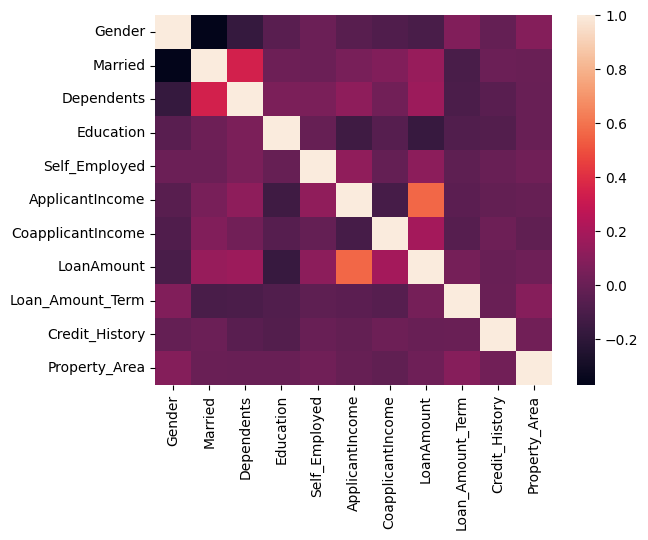

In [16]:
import seaborn as sns
sns.heatmap(features.corr());

In [29]:
import numpy as np

features_corr = features.corr()
indexs = np.tril_indices_from(feature_corr)

for i in zip(*indexs):
    features_corr.iloc[i[0], i[1]] = np.NaN

features_corr = (features_corr
                 .stack()
                 .to_frame()
                 .reset_index()
                 .rename(columns={'level_0':'feature1',
                                  'level_1':'feature2',
                                  0:'correlation'}))
features_corr['abs_correlation']= features_corr.correlation.abs()
features_corr.head()

,feature1,feature2,correlation,abs_correlation
0,Gender,Married,-0.369612,0.369612
1,Gender,Dependents,-0.175970,0.175970
2,Gender,Education,-0.049258,0.049258
3,Gender,Self_Employed,0.005903,0.005903
4,Gender,ApplicantIncome,-0.053989,0.053989


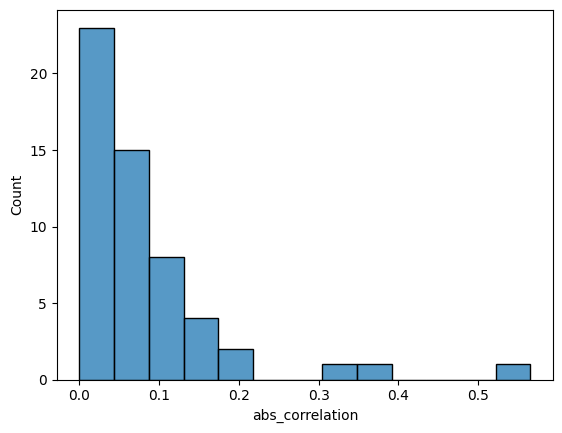

In [34]:
sns.histplot(features_corr.abs_correlation);

In [35]:
features_corr.sort_values(
    'correlation', ascending=False).query(
    'abs_correlation > 0.5')

,feature1,feature2,correlation,abs_correlation
41,ApplicantIncome,LoanAmount,0.565181,0.565181


In [ ]:
# Random Forest


In [5]:
X = df[df.columns[1:-1]]
y = df['Loan_Status']

X['Gender'].fillna(X['Gender'].mode()[0], inplace=True)
X['Married'].fillna(X['Married'].mode()[0], inplace=True)
X['Dependents'].fillna(X['Dependents'].mode()[0], inplace=True)
X['Self_Employed'].fillna(X['Self_Employed'].mode()[0], inplace=True)
X['Credit_History'].fillna(X['Credit_History'].mode()[0], inplace=True)
X['Loan_Amount_Term'].fillna(X['Loan_Amount_Term'].mode()[0], inplace=True)
X['LoanAmount'].fillna(X['LoanAmount'].median(), inplace=True)
y.replace(['N','Y'],[0,1],inplace=True)

import warnings
warnings.filterwarnings("ignore")
X['Gender'].replace(['Male','Female'],[0,1],inplace=True)
X['Married'].replace(['No','Yes'],[0,1],inplace=True)
X['Dependents'].replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
X['Education'].replace(['Graduate', 'Not Graduate'],[0,1],inplace=True)
X['Self_Employed'].replace(['No','Yes'],[0,1],inplace=True)
X['Property_Area'].replace(['Urban', 'Rural', 'Semiurban'],[0,1,2],inplace=True)

In [105]:
# Backward Elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

estimator = LogisticRegression(max_iter=150)
selector = RFE(estimator, n_features_to_select=4, step=1)
selector.fit(X,y)
X_selected = selector.transform(X)
print(f'Support features', selector.support_)
print(f'Features ranking by importance', selector.ranking_)

rank_1=[]
for i in range(0,len(selector.ranking_)):
    if selector.ranking_[i] == 1:
        rank_1.append(i)

print(f'The four most informative features are:', X.iloc[:,rank_1].columns)

Support features [False  True False  True False False False False False  True  True]
Features ranking by importance [2 1 4 1 3 8 7 5 6 1 1]
The four most informative features are: Index(['Married', 'Education', 'Credit_History', 'Property_Area'], dtype='object')


In [116]:
# Forward Features Selection
from sklearn.feature_selection import SelectKBest, f_classif

X_selected = SelectKBest(score_func=f_classif, k=7)
X_selected.fit_transform(X, y)

import numpy as np
scores = -np.log10(X_selected.pvalues_)
ind = np.argpartition(scores, -7)[-7:]
print(f'the seven best features are: ', X.iloc[:,ind].columns)

the seven best features are:  Index(['Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome', 'Education',
       'Married', 'Credit_History', 'Property_Area'],
      dtype='object')


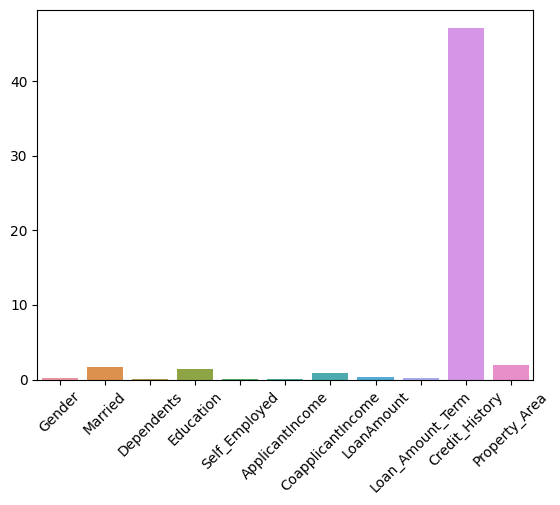

In [127]:
plot = sns.barplot(x=X.columns, y=scores)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

In [134]:
# Factor analysis
## pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,
                   impute = 'drop',
                   n_factors = X.shape[1])
fa.fit(X)

ev,_ = fa.get_eigenvalues()
ev

array([1.91403748, 1.47922947, 1.13333298, 1.06351883, 1.00414657,
       0.97984153, 0.89341992, 0.83111924, 0.78102978, 0.57297741,
       0.34734679])

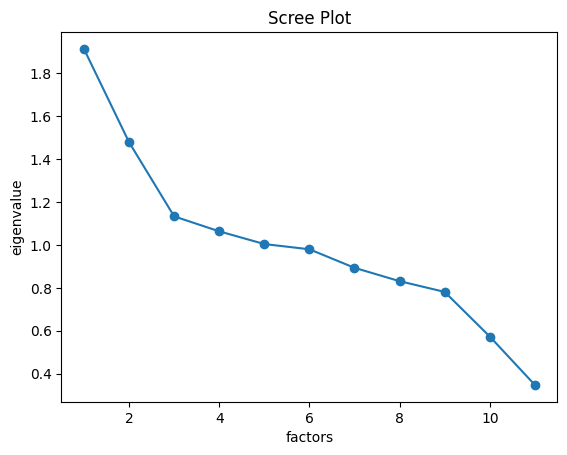

In [137]:
import matplotlib.pyplot as plt
plt.scatter(range(1,X.shape[1]+1), ev)
plt.plot(range(1,X.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('factors')
plt.ylabel('eigenvalue')
plt.show();

In [9]:
# PCA
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

## create pca_df DataFrame
X_pca = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
pca_df = X_pca
pca_df['Loan Status'] = y

# pca.explained_variance_

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=2023)
X_kpca = kpca.fit_transform(X_pca)

## create kpca_df DataFrame
X_kpca = pd.DataFrame(data=X_kpca, columns=['PC1','PC2'])
kpca_df = X_kpca
kpca_df['Loan Status'] = y

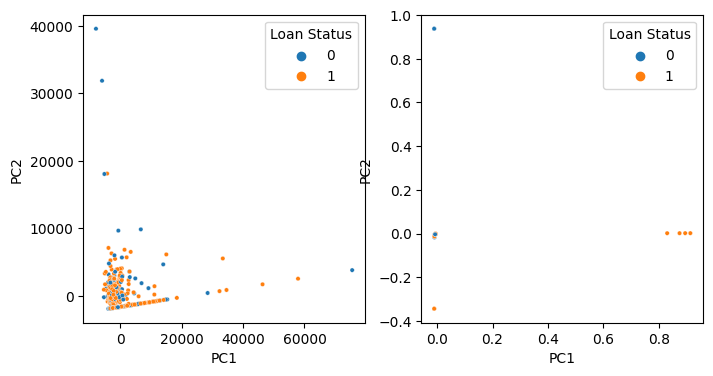

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

sns.scatterplot(ax=axes[0], x='PC1', y='PC2', data=pca_df, hue='Loan Status', s=10)
sns.scatterplot(ax=axes[1], x='PC1', y='PC2', data=kpca_df, hue='Loan Status', s=10)

plt.show();

In [ ]:
# Project: PCA on Huge Multi-columnar Dataset
# PCA - Hand Gesture prediction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

